In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

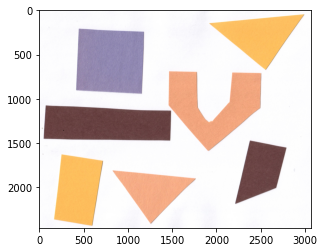

In [2]:
# load the image
image = skimage.io.imread("Hw2/shapes-01.jpg")

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

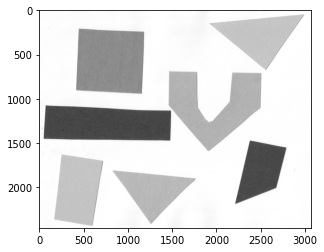

In [3]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()

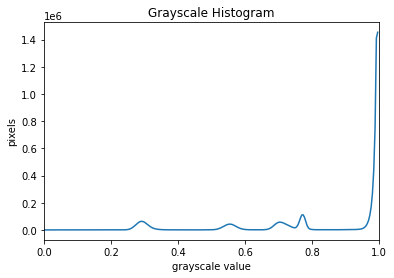

In [4]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

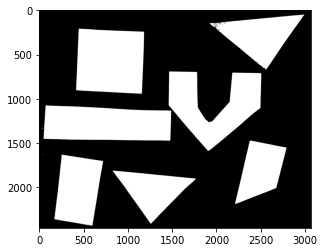

In [5]:
# create a mask based on the threshold
t = 0.8
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

# ข้อที่ 1

## อธิบายอัลกอริทึมในการหาค่าเทรชโฮลด์จากภาพระดับเทาใดๆ โดยอัตโนมัติ (Automatic Threshold) ที่ไม่ซ้ำกับที่กล่าวไปแล้วในห้องบรรยาย มาคนละ 2 อัลกอริทึม นักศึกษาควรทดลองใช้อัลกอริทึมดังกล่าวกับภาพระดับเทาใดๆ ภาพเดียวกัน แล้วอภิปรายผล

> Threshold ที่อาจารย์บรรยายคือ T = (max - min) / 2

### แสดงผลของ Thresold: T = (max-min)/2

In [6]:
import cv2

In [7]:
img1 = cv2.imread("Hw2/shapes-01.jpg", 0)

In [8]:
print(f"Max value of grayscale pics: {img1.max()}")
print(f"Min value of grayscale pics: {img1.min()}")

Max value of grayscale pics: 255
Min value of grayscale pics: 0


In [9]:
##############################################################
# Gaussian Filtering
##############################################################
img1_blur = cv2.GaussianBlur(img1,(5,5),0)

In [10]:
img1_blur

array([[250, 250, 250, ..., 253, 254, 254],
       [250, 250, 250, ..., 253, 254, 254],
       [251, 251, 252, ..., 254, 254, 254],
       ...,
       [253, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 253, 253, 253],
       [252, 252, 253, ..., 253, 253, 253]], dtype=uint8)

In [11]:
print(f"Max value of grayscale pics after Mean Filtering: {img1_blur.max()}")
print(f"Min value of grayscale pics after Mean Filtering: {img1_blur.min()}")

Max value of grayscale pics after Mean Filtering: 255
Min value of grayscale pics after Mean Filtering: 3


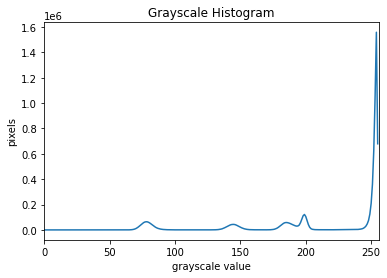

In [12]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(img1_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

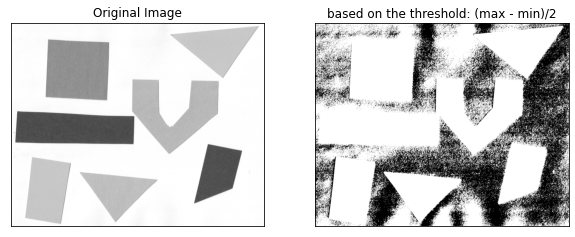

In [13]:
# create a mask based on the threshold
t = (np.max(img1_blur)) - (np.min(img1_blur)) / 2
    
binary_mask = img1_blur < t
     
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(binary_mask, 'gray'),plt.title('based on the threshold: (max - min)/2')
plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Mean Thresholding 

In [14]:
thresh = cv2.adaptiveThreshold(img1_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 10)

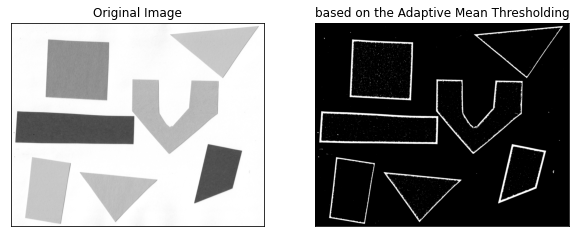

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray'),plt.title('based on the Adaptive Mean Thresholding')
plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Gussian Thresholding

In [16]:
thresh2 = cv2.adaptiveThreshold(img1_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 10)

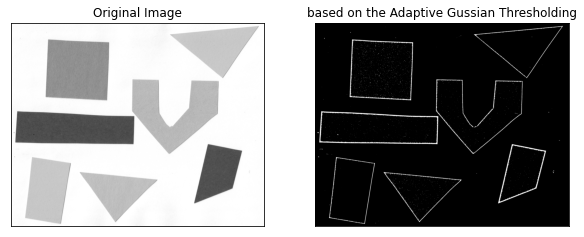

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh2, 'gray'),plt.title('based on the Adaptive Gussian Thresholding')
plt.xticks([]), plt.yticks([])
plt.show()

### Simple Thresholding

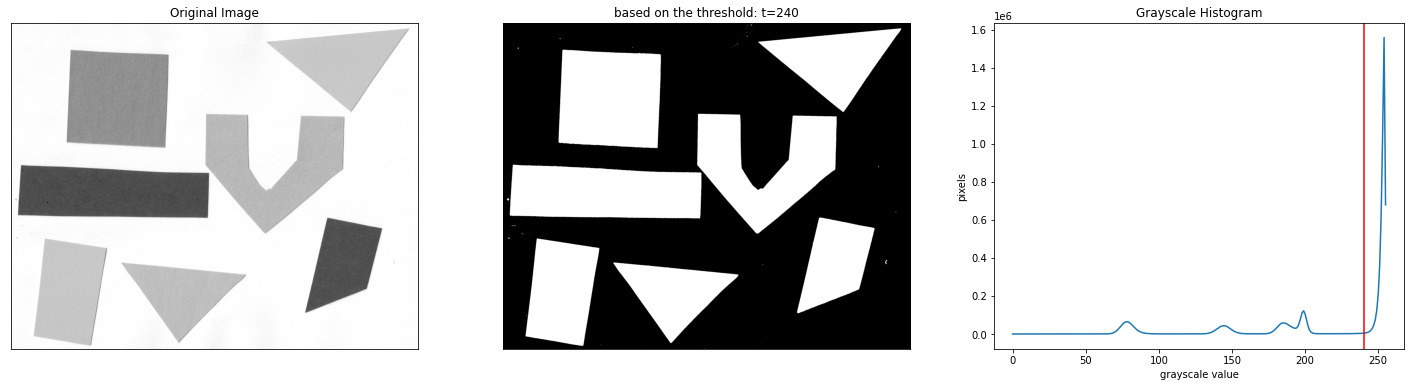

In [272]:
t = 240 # ดูจากราฟ Histogram
    
binary_mask2 = img1_blur < t
     
plt.figure(figsize=(25,6))
plt.subplot(131),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(binary_mask2, 'gray'),plt.title('based on the threshold: t=240')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.plot(bin_edges[0:-1], histogram),plt.axvline(x = 240, color = 'r')
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

# ข้อ 2

## จากรูปที่กำหนดให้
##     - นักศึกษาที่เลขทะเบียน หลักรองสุดท้าย เป็นเลขคู่ ทำงานกับภาพ circle.jpg
## จงคิดและเขียนอัลกอริทึมเพื่อนับจำนวนวงกลมหรือสามเหลี่ยมในภาพให้ได้เท่า (หรือใกล้เคียงมากที่สุด) กับจำนวนที่นับด้วยคน อธิบายวิธี/ขั้นตอน/อัลกอริทึมที่ใช้


In [182]:
img_ex2 = cv2.imread("hw2/circles.JPG")
gray_img = cv2.cvtColor(img_ex2, cv2.COLOR_BGR2GRAY)

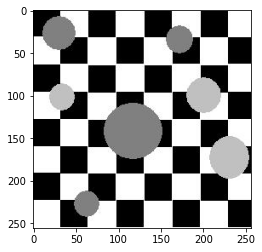

In [183]:
plt.imshow(img_ex2)

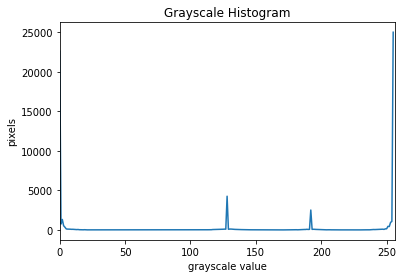

In [184]:
# create a histogram of the grayscale image
histogram3, bin_edges3 = np.histogram(gray_img, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges3[0:-1], histogram3)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

In [185]:
circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,30,param1=100,param2=28,minRadius=0,maxRadius=0)

In [186]:
circles

array([[[117.5, 143.5,  35.1],
        [ 62.5, 226.5,  14.5],
        [ 33.5, 100.5,  15. ],
        [192.5,  92.5,  29.7],
        [233.5, 173.5,  26.8],
        [172.5,  33.5,  15. ]]], dtype=float32)

In [187]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
 # draw the outer circle
 cv2.circle(img_ex2,(i[0],i[1]),i[2],(0,255,0),2)
 # draw the center of the circle
 cv2.circle(img_ex2,(i[0],i[1]),2,(0,0,255),3)

(-0.5, 255.5, 255.5, -0.5)

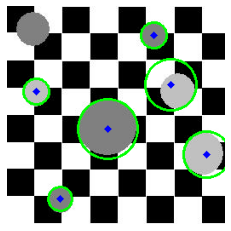

In [188]:
plt.imshow(img_ex2)
plt.axis("off")

# ข้อที่ 3

## จากรูปที่กำหนดให้ต่อไปนี้ ให้นักศึกษาทดลองใช้อัลกอริทึมที่ใช้ในข้อที่ 1. เพื่อนำจำนวนสัตว์ในภาพ

##     - เลขทะเบียนสองหลักสุดท้ายอยู่ในช่วง 30-59 ทำงานกับภาพ ani01.jpg, ani03.jpg และ ani05.jpg

##     พิจารณาผลที่ได้ว่าใกล้เคียงกับการนับด้วยคนหรือไม่ อย่างไร ลองพยายามหาวิธีปรับปรุงอัลกอริทึมของตนเพื่อให้ได้ผลลัพธ์ที่ดียิ่งขึ้นสำหรับแต่ละภาพ อธิบายแนวคิดและวิธีการ/ขั้นตอน/อัลกอริทึม (ใหม่) ที่ใช้ รวมทั้งอภิปรายผลที่ได้

In [195]:
#ani01.jpg
ex3_pic1 = cv2.imread("hw2/ani01.jpg")
ex3_pic1_rgb = cv2.cvtColor(ex3_pic1, cv2.COLOR_BGR2RGB)
#ani03.jpg
ex3_pic2 = cv2.imread("hw2/ani03.jpg")
ex3_pic2_rgb = cv2.cvtColor(ex3_pic2, cv2.COLOR_BGR2RGB)
#ani05.jpg
ex3_pic3 = cv2.imread("hw2/ani05.jpg")
ex3_pic3_rgb = cv2.cvtColor(ex3_pic3, cv2.COLOR_BGR2RGB)

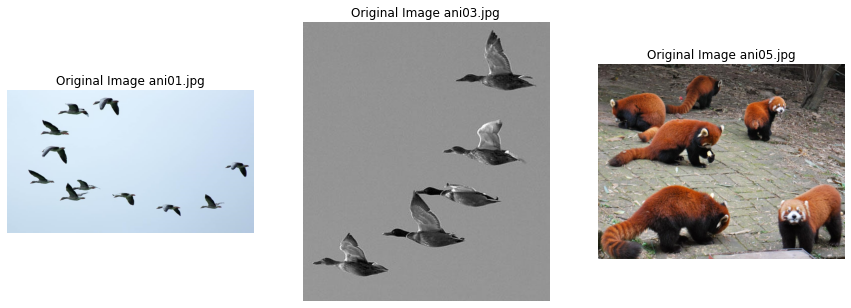

In [197]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(ex3_pic1_rgb),plt.title('Original Image ani01.jpg')
plt.axis("off")
plt.subplot(132),plt.imshow(ex3_pic2_rgb),plt.title('Original Image ani03.jpg')
plt.axis("off")
plt.subplot(133),plt.imshow(ex3_pic3_rgb),plt.title('Original Image ani05.jpg')
plt.axis("off")
plt.show()

In [268]:
# ani01.jpg
# convert to grayscale
ex3_pic1_grey = cv2.cvtColor(ex3_pic1, cv2.COLOR_RGB2GRAY)

# Gaussian Filtering
ex3_pic1_grey_blur = cv2.GaussianBlur(ex3_pic1_grey,(5,5),0)

# Adaptive Mean Thresholding
ex3_pic1_grey_thresh = cv2.adaptiveThreshold(ex3_pic1_grey_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 10)

# ani03.jpg
# convert to grayscale
ex3_pic2_grey = cv2.cvtColor(ex3_pic2, cv2.COLOR_RGB2GRAY)

# Gaussian Filtering
ex3_pic2_grey_blur = cv2.GaussianBlur(ex3_pic2_grey,(5,5),0)

# Adaptive Mean Thresholding
ex3_pic2_grey_thresh = cv2.adaptiveThreshold(ex3_pic2_grey_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 10)

# ani05.jpg
# convert to grayscale
ex3_pic3_grey = cv2.cvtColor(ex3_pic3, cv2.COLOR_RGB2GRAY)

# Median Filtering
ex3_pic3_grey_blur = cv2.medianBlur(ex3_pic3_grey,5)

# Adaptive Mean Thresholding
ex3_pic3_grey_thresh = cv2.adaptiveThreshold(ex3_pic3_grey_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 10)
# ex3_pic3_grey_thresh2 = cv2.adaptiveThreshold(ex3_pic3_grey_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 10)
# ex3_pic3_grey_thresh3 = ex3_pic3_grey_thresh + ex3_pic3_grey_thresh2

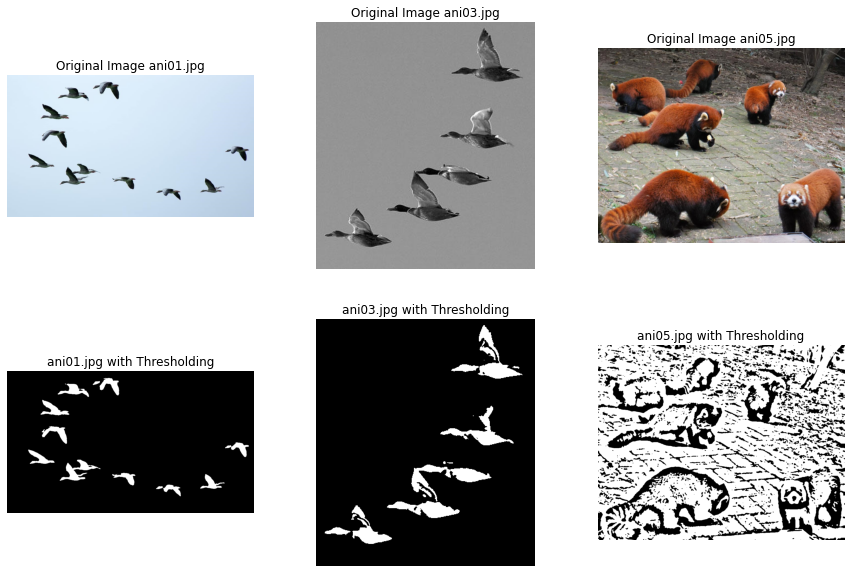

In [281]:
plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(ex3_pic1_rgb),plt.title('Original Image ani01.jpg')
plt.axis("off")
plt.subplot(232),plt.imshow(ex3_pic2_rgb),plt.title('Original Image ani03.jpg')
plt.axis("off")
plt.subplot(233),plt.imshow(ex3_pic3_rgb),plt.title('Original Image ani05.jpg')
plt.axis("off")
plt.subplot(234),plt.imshow(ex3_pic1_grey_thresh, "gray"),plt.title('ani01.jpg with Thresholding')
plt.axis("off")
plt.subplot(235),plt.imshow(ex3_pic2_grey_thresh, "gray"),plt.title('ani03.jpg with Thresholding')
plt.axis("off")
plt.subplot(236),plt.imshow(ex3_pic3_grey_thresh, "gray"),plt.title('ani05.jpg with Thresholding')
plt.axis("off")
plt.show()

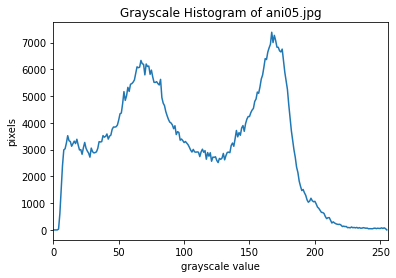

In [284]:
# create a histogram of the grayscale ani05 image
histogram_ex3_pic3, bin_edges_ex3_pic3 = np.histogram(ex3_pic3_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic3[0:-1], histogram_ex3_pic3)
plt.title("Grayscale Histogram of ani05.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

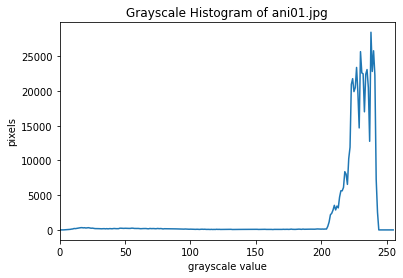

In [285]:
# create a histogram of the grayscale ani01 image
histogram_ex3_pic1, bin_edges_ex3_pic1 = np.histogram(ex3_pic1_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic1[0:-1], histogram_ex3_pic1)
plt.title("Grayscale Histogram of ani01.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

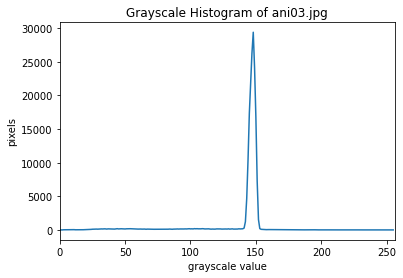

In [286]:
# create a histogram of the grayscale ani03 image
histogram_ex3_pic2, bin_edges_ex3_pic2 = np.histogram(ex3_pic2_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic2[0:-1], histogram_ex3_pic2)
plt.title("Grayscale Histogram of ani03.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()